
# Welcome to my Jupyter Notebook purr🐈‍⬛ject!
#### I will briefly walk you through various functions to conduct linguistic analysis on a text of your own choice. Though there is a plethora of other tools to work with, I selected the ones I thought could prove useful to working on a thesis, mainly NLTK, but also BeautifulSoup, spaCy, or Matplotlib. I chose to conduct the analysis on an article relating to cats, as I believe it will be less mundane and concurrently more entertaining to aqcuire the **NLP** knowledge available nowadays! 🐈‍⬛

# 1. NLTK and the basics: importing modules, extracting text content from a web page.

Firstly, I imported the **requests module**, which allows the user to send HTTP requests using Python, in order to receive back all the response data (including content, which is the most important in this case).

In [ ]:
import requests
page = requests.get("https://www.theguardian.com/lifeandstyle/2021/dec/08/the-inner-lives-of-cats-what-our-feline-friends-really-think-about-hugs-happiness-and-humans")
print(page.content)

Subsequently, I  imported the package called **BeautifulSoup**, a tool that allows to scrape information from web pages.

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

Next, using the command **content = soup.find_all('p')**, I searched for all paragraph elements in the HTML content stored in soup and assigned them to the variable **content**. The **print(content)** statement outputs the full list of paragraph elements.







In [ ]:
content = soup.find_all('p')
print(content)

[<p>They do what they want, all the time – and can teach us a lot about how to live in the present, be content and learn from our experience</p>, <p class="dcr-shm5ll"><span class="dcr-15rw6c2" style="color:var(--drop-cap);font-weight:700;">I</span> wanted to know the exact amount of time I spend ruminating on the inner lives of my cats, so I did what most people do in times of doubt, and consulted Google. According to my search history, in the two years since I became a cat owner I have Googled variations of “cat love me – how do I tell?” and “is my cat happy” 17 times. I have also inadvertently subscribed to cat-related updates from the knowledge website Quora, which emails me a daily digest. (Sample: <a data-link-name="in body link" href="https://www.quora.com/Can-cats-be-angry-or-disappointed-with-their-owners">Can Cats Be Angry or Disappointed With Their Owner?</a>)</p>, <p class="dcr-shm5ll">How do I love my cats? Let me count the ways. The clean snap of three-year-old Larry’s ja

Then, using a _for loop_ and an _if statement_, I extracted the text content from the previously requested article, simultaneously storing the non-empty text strings in a new list.

In [ ]:
only_text = []

for el in content:
    if len(el.getText().strip()) > 0:
        only_text.append(el.getText())

print(only_text)

['They do what they want, all the time – and can teach us a lot about how to live in the present, be content and learn from our experience', 'I wanted to know the exact amount of time I spend ruminating on the inner lives of my cats, so I did what most people do in times of doubt, and consulted Google. According to my search history, in the two years since I became a cat owner I have Googled variations of “cat love me – how do I tell?” and “is my cat happy” 17 times. I have also inadvertently subscribed to cat-related updates from the knowledge website Quora, which emails me a daily digest. (Sample: Can Cats Be Angry or Disappointed With Their Owner?)', 'How do I love my cats? Let me count the ways. The clean snap of three-year-old Larry’s jaw as he contemplates me with detached curiosity is my favourite sound in the world. I love the tenor and cadence of my six-month-old kitten Kedi’s miaows as he follows me around the house. (High-pitched indignant squeaks means he wants food; lower-

A very significant step is importing the Natural Language Toolkit **(NLTK)** library in Python. The library contains a wide range of linguistic resources and tools suitable for further natural language processing endeavours.

Importantly, the command **nltk.download("all")** downloads all available NLTK datasets, corpora, and models, as opposed to the **nltk.download("popular")** command, which downloads only the most frequently used datasets and models.

In [ ]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

# 2. The side quest: spaCy, RegexpTokenizer, Wordnet.

In this part of the project, I decided to employ different tools, such as spaCy, RegexpTokenizer and Wordnet, in order to:

1.   delete stopwords from the text,
2.   tokenize the text,
3.   find the most frequent words,
4.   for the most frequent word - find information on wordnet,

thus the titular **side quest**.

Firstly, I imported **spaCy**, a tool which allows to process a list of text paragraphs, remove stop words (e.g. "the", "a", "there"), and create a clean text output without said stop words.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

doc = nlp(str(only_text))

filtered_words = [token.text for token in doc if not token.is_stop]

clean_text = ' '.join(filtered_words)

print(clean_text)

[ ' want , time – teach lot live present , content learn experience ' , ' wanted know exact time spend ruminating inner lives cats , people times doubt , consulted Google . According search history , years cat owner Googled variations “ cat love – tell ? ” “ cat happy ” 17 times . inadvertently subscribed cat - related updates knowledge website Quora , emails daily digest . ( Sample : Cats Angry Disappointed Owner ? ) ' , ' love cats ? Let count ways . clean snap - year - old Larry jaw contemplates detached curiosity favourite sound world . love tenor cadence - month - old kitten Kedi miaows follows house . ( High - pitched indignant squeaks means wants food ; lower - pitched chirrups suggest like play . ) love weight Larry feet night scratchy caress Kedi tongue eyelid morning . ' , ' know little tykes think feel ? fear authors online listicles written cursive fonts unlikely provide latest scientific research – probably saying think want hear . truly journey feline soul , fountainhead 

Subsequently, I imported the **RegexpTokenizer** tool in order to tokenize the text, based on a regular expression pattern **\w+**, which matches any word character (alphanumeric characters and underscores).

In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

tokens = tokenizer.tokenize(clean_text)

print(tokens)

['want', 'time', 'teach', 'lot', 'live', 'present', 'content', 'learn', 'experience', 'wanted', 'know', 'exact', 'time', 'spend', 'ruminating', 'inner', 'lives', 'cats', 'people', 'times', 'doubt', 'consulted', 'Google', 'According', 'search', 'history', 'years', 'cat', 'owner', 'Googled', 'variations', 'cat', 'love', 'tell', 'cat', 'happy', '17', 'times', 'inadvertently', 'subscribed', 'cat', 'related', 'updates', 'knowledge', 'website', 'Quora', 'emails', 'daily', 'digest', 'Sample', 'Cats', 'Angry', 'Disappointed', 'Owner', 'love', 'cats', 'Let', 'count', 'ways', 'clean', 'snap', 'year', 'old', 'Larry', 'jaw', 'contemplates', 'detached', 'curiosity', 'favourite', 'sound', 'world', 'love', 'tenor', 'cadence', 'month', 'old', 'kitten', 'Kedi', 'miaows', 'follows', 'house', 'High', 'pitched', 'indignant', 'squeaks', 'means', 'wants', 'food', 'lower', 'pitched', 'chirrups', 'suggest', 'like', 'play', 'love', 'weight', 'Larry', 'feet', 'night', 'scratchy', 'caress', 'Kedi', 'tongue', 'ey

Using the **FreqDist** command, I calculated the frequency distribution of words in the chosen article. Then, I employed the **freq.most_common** command in order to find the most common words in the article, in this particular case the first three ones.

In [ ]:
freq = nltk.FreqDist(full_text)

print(freq.most_common(3))

[("'cats',", 36), ("'says',", 22), ("'cat',", 20)]


Having found out that the most frequent word in the article is indeed "cats" as I had assumed before conducting the analysis, I decided to find additional information about said word with the help of **Wordnet**. Wordnet is a lexical database for English language, grouping words into set of synonyms called synsets. The website provides general definitions of the words, as well as displays the various semantic relationships between said synsets.

In [ ]:
from nltk.corpus import wordnet
syns = wordnet.synsets("cats")

print(syns[0].name())

print(syns[0].lemmas()[0].name())

print(syns[0].definition())


cat.n.01
cat
feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats


The code above first prints the name of the first synset, then the first lemma of the word in the synset, and lastly the definition associated with the synset. For the first synset "cat," we find out that it is a "feline mammal usually having think soft fur and no ability to roar, including domestic cats and wildcats."

And so we're done with section two. Purrrfect! 🐈‍⬛

# 3. NLTK: tokenization, POS tagging

NLTK allows to process the linguistic data in various manners, including tokenization (be it into words or sentences), as well as POS tagging, which is a crucial procedure in NLP. <br>
Below, I decided to first concatenate the text into a single string in Python, using the **map** function (it applies a function to every item of an iterable). Then, I tokenized the text into single words.

In [ ]:
full = ''.join(map(str,only_text))
tokenized = nltk.word_tokenize(full)
print(tokenized)

['They', 'do', 'what', 'they', 'want', ',', 'all', 'the', 'time', '–', 'and', 'can', 'teach', 'us', 'a', 'lot', 'about', 'how', 'to', 'live', 'in', 'the', 'present', ',', 'be', 'content', 'and', 'learn', 'from', 'our', 'experienceI', 'wanted', 'to', 'know', 'the', 'exact', 'amount', 'of', 'time', 'I', 'spend', 'ruminating', 'on', 'the', 'inner', 'lives', 'of', 'my', 'cats', ',', 'so', 'I', 'did', 'what', 'most', 'people', 'do', 'in', 'times', 'of', 'doubt', ',', 'and', 'consulted', 'Google', '.', 'According', 'to', 'my', 'search', 'history', ',', 'in', 'the', 'two', 'years', 'since', 'I', 'became', 'a', 'cat', 'owner', 'I', 'have', 'Googled', 'variations', 'of', '“', 'cat', 'love', 'me', '–', 'how', 'do', 'I', 'tell', '?', '”', 'and', '“', 'is', 'my', 'cat', 'happy', '”', '17', 'times', '.', 'I', 'have', 'also', 'inadvertently', 'subscribed', 'to', 'cat-related', 'updates', 'from', 'the', 'knowledge', 'website', 'Quora', ',', 'which', 'emails', 'me', 'a', 'daily', 'digest', '.', '(', '

Tokenization does not only tackle the case of dividing a text into words, but also into sentences. <br>
Here, I employed the word_tokenize command to split the text into sentences. As you can see, it works **purrfectly**!


In [ ]:
for sentence in only_text:
  print(nltk.word_tokenize(sentence))

['They', 'do', 'what', 'they', 'want', ',', 'all', 'the', 'time', '–', 'and', 'can', 'teach', 'us', 'a', 'lot', 'about', 'how', 'to', 'live', 'in', 'the', 'present', ',', 'be', 'content', 'and', 'learn', 'from', 'our', 'experience']
['I', 'wanted', 'to', 'know', 'the', 'exact', 'amount', 'of', 'time', 'I', 'spend', 'ruminating', 'on', 'the', 'inner', 'lives', 'of', 'my', 'cats', ',', 'so', 'I', 'did', 'what', 'most', 'people', 'do', 'in', 'times', 'of', 'doubt', ',', 'and', 'consulted', 'Google', '.', 'According', 'to', 'my', 'search', 'history', ',', 'in', 'the', 'two', 'years', 'since', 'I', 'became', 'a', 'cat', 'owner', 'I', 'have', 'Googled', 'variations', 'of', '“', 'cat', 'love', 'me', '–', 'how', 'do', 'I', 'tell', '?', '”', 'and', '“', 'is', 'my', 'cat', 'happy', '”', '17', 'times', '.', 'I', 'have', 'also', 'inadvertently', 'subscribed', 'to', 'cat-related', 'updates', 'from', 'the', 'knowledge', 'website', 'Quora', ',', 'which', 'emails', 'me', 'a', 'daily', 'digest', '.', '

Part-of-Speech (POS) tagging is a pivotal step in natural language processing (NLP), as it involves assigning a grammatical category to each word in a sentence. Implementing POS tagging allows for further, more complex linguistic data analysis. <br>
In the instance below, I aimed to tokenize each sentence, then perform part-of-speech tagging on the tokens using NLTK, to lastly store the **(word, tag)** pairs in tuples.


In [ ]:
tuples = []

for sentence in only_text:
    tokens = nltk.word_tokenize(sentence)
    pos_tagged = nltk.pos_tag(tokens)
    for item in pos_tagged:
        tuples.append(item)

print(tuples)

[('They', 'PRP'), ('do', 'VBP'), ('what', 'WP'), ('they', 'PRP'), ('want', 'VBP'), (',', ','), ('all', 'PDT'), ('the', 'DT'), ('time', 'NN'), ('–', 'NN'), ('and', 'CC'), ('can', 'MD'), ('teach', 'VB'), ('us', 'PRP'), ('a', 'DT'), ('lot', 'NN'), ('about', 'IN'), ('how', 'WRB'), ('to', 'TO'), ('live', 'VB'), ('in', 'IN'), ('the', 'DT'), ('present', 'JJ'), (',', ','), ('be', 'VB'), ('content', 'JJ'), ('and', 'CC'), ('learn', 'NN'), ('from', 'IN'), ('our', 'PRP$'), ('experience', 'NN'), ('I', 'PRP'), ('wanted', 'VBD'), ('to', 'TO'), ('know', 'VB'), ('the', 'DT'), ('exact', 'JJ'), ('amount', 'NN'), ('of', 'IN'), ('time', 'NN'), ('I', 'PRP'), ('spend', 'VBP'), ('ruminating', 'VBG'), ('on', 'IN'), ('the', 'DT'), ('inner', 'JJ'), ('lives', 'NNS'), ('of', 'IN'), ('my', 'PRP$'), ('cats', 'NNS'), (',', ','), ('so', 'IN'), ('I', 'PRP'), ('did', 'VBD'), ('what', 'WP'), ('most', 'JJS'), ('people', 'NNS'), ('do', 'VBP'), ('in', 'IN'), ('times', 'NNS'), ('of', 'IN'), ('doubt', 'NN'), (',', ','), ('and

After performing part-of-speech tagging using NLTK, I decided to count the frequency of each part-of-speech tag within the article, subsequently storing the results in a dictionary.

In [ ]:
counter_dict = {}

for el in tuples:
    tag = el[1]
    if not tag in counter_dict:
        counter_dict[tag] = 1
    else:
        counter_dict[tag] += 1

print(*(f"{key}:{value}" for key, value in counter_dict.items()), sep=", " )

PRP:180, VBP:142, WP:19, ,:120, PDT:2, DT:173, NN:314, CC:74, MD:31, VB:110, IN:251, WRB:21, TO:57, JJ:181, PRP$:61, VBD:41, VBG:54, NNS:165, JJS:7, NNP:117, .:138, CD:4, VBN:50, VBZ:77, RB:101, WDT:14, (:4, ::12, ):4, RBS:3, EX:7, NNPS:10, RBR:4, RP:7, JJR:4


# 4. Data visualization: matplotlib, pandas, seaborn

An essential proccess in the analysis of any linguistic data is **data visualization**. _Let's be honest_: a long block of text will not entertain the reader as much as a cute, personalized graph! It truly does enhance the experience. <br>
Hence, let's delve deeper into the visual side of data analysis, with implementation of tools, such as matplotlib, pandas, and seaborn.

**MATPLOTLIB** <br>
Matplotlib is a comprehensive library, allowing the users to create static, animated, and interactive visualizations in Python. <br>

Having previously extracted key and value pairs (tags and their counts), I decided to visualize the data using Matplotlib.

In [ ]:
import matplotlib.pyplot as plt

keys = []
values = []
for el in counter_dict:
    keys.append(el)
    values.append(counter_dict[el])

Data analysis and visualization processes **do not** have to be DULL! <br>
<br>
An example is displaying the data using bar charts, which you can endlessly personalize to your own liking. Below, I visualized the top 10 most frequent part-of-speech tags, and their corresponding frequencies. _Of course_, I personalized the color of the bar to suit my aesthetic!

<BarContainer object of 10 artists>

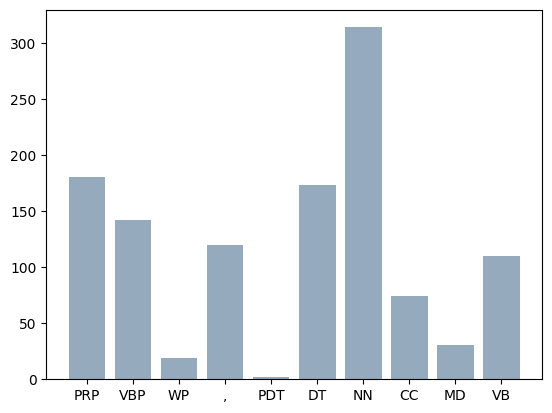

In [ ]:
plt.bar(keys[0:10], values[0:10], color = "#95aabd")


Here is another instance of how you can choose between different types of charts and personalize them! <br>
The same data of the 10 most frequent part-of-speech tags and their corresponding frequencies were visualized into a pie chart below. <br>
More colorful = better information comprehension!

([<matplotlib.patches.Wedge at 0x7afd9fb17c70>,
 [Text(0.9729391270700544, 0.513214823457157, 'PRP'),
  Text(0.23691693666664454, 1.0741835807349196, 'VBP'),
  Text(-0.23691705609627906, 1.0741835543940677, 'WP'),
  Text(-0.6137453474247074, 0.9128617904779044, ','),
  Text(-0.8757643102703089, 0.6656101508065893, 'PDT'),
  Text(-1.0826239316883184, 0.19474450579086391, 'DT'),
  Text(-0.46405849002640576, -0.9973212711230081, 'NN'),
  Text(0.6308665311334142, -0.9011145431606867, 'CC'),
  Text(0.8574988501461892, -0.688981655777542, 'MD'),
  Text(1.0519593037311774, -0.3215301281270805, 'VB')])

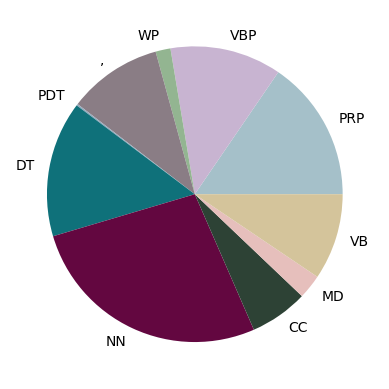

In [ ]:
plt.pie(values[0:10], labels=keys[0:10], colors = {"#93b591", "#a5c0c9", "#c8b4d1", "#8a7d85", "#630740", "#2d4235", "#95aabd", "#d4c49b", "#0f717a","#e6bfbc"})

To try out different methods, I also decided to implement a scatter plot, which is yet another form of data visualization. Though it may not be as useful in linguistic data visualization in this particular instance, I thought it would be interesting to display a different visual side of graphs.

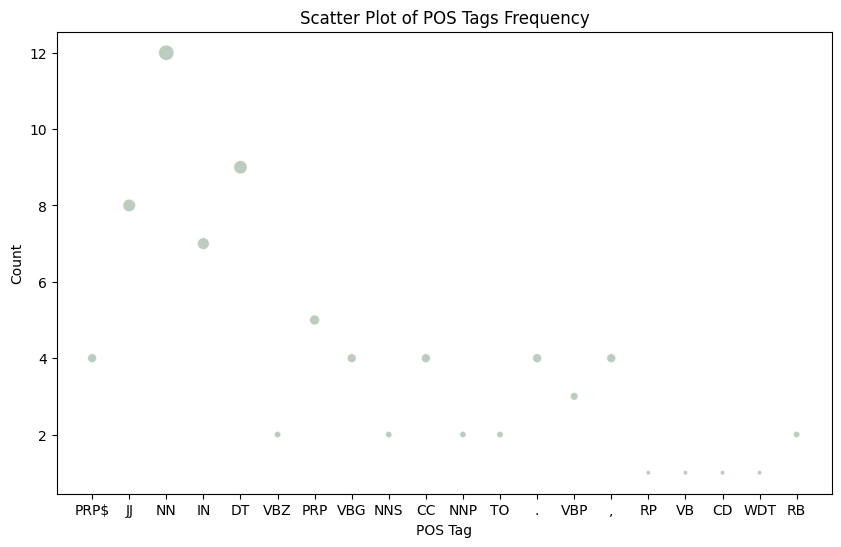

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['POS Tag'], df['Count'], s=df['Count']*10, color='#90ab95', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.title('Scatter Plot of POS Tags Frequency')
plt.show()

**PANDAS** <br>
While Pandas is primarily known for its data manipulation capabilities, it also plays a significant role in data visualization when simultaneously utilized with other libraries (Matplotlib or Seaborn). <br>


I incorporated **Pandas** to calculate and visualize the frequency distribution of  POS tags for data handling and **Matplotlib** for visualization.<br>
The result is a more complex chart, including the labels for POS tag and count, as well as a title above the chart.

[('NN', 12), ('DT', 9), ('JJ', 8), ('IN', 7), ('PRP', 5), ('PRP$', 4), ('VBG', 4), ('CC', 4), ('.', 4), (',', 4), ('VBP', 3), ('VBZ', 2), ('NNS', 2), ('NNP', 2), ('TO', 2), ('RB', 2), ('RP', 1), ('VB', 1), ('CD', 1), ('WDT', 1)]


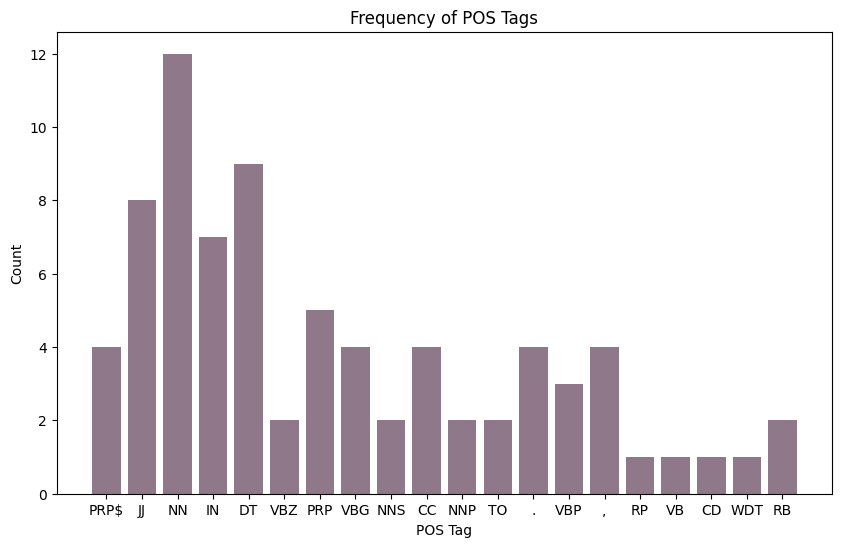

In [ ]:
import pandas as pd

tags = [tag for word, tag in pos_tagged]

freqy = nltk.FreqDist(tags)
print(freqy.most_common())

df = pd.DataFrame(list(freqy.items()), columns=['POS Tag', 'Count'])

plt.figure(figsize=(10, 6))
plt.bar(df['POS Tag'], df['Count'], color ='#8f7889')
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.title('Frequency of POS Tags')
plt.show()



**SEABORN** <br>
Seaborn is a Python library, incorporating Matplotlib as its foundation. The library offers a plethora of visually appealing and informative statistical graphs, implementing its built-in themes, color palettes, and other useful functions.


Below, I employed the seaborn library to create a horizontal bar graph, another technique of visualizing linguistic data. Intriguing is the feature of built-in color palettes, which greatly enhances the visual appeal of the graph.

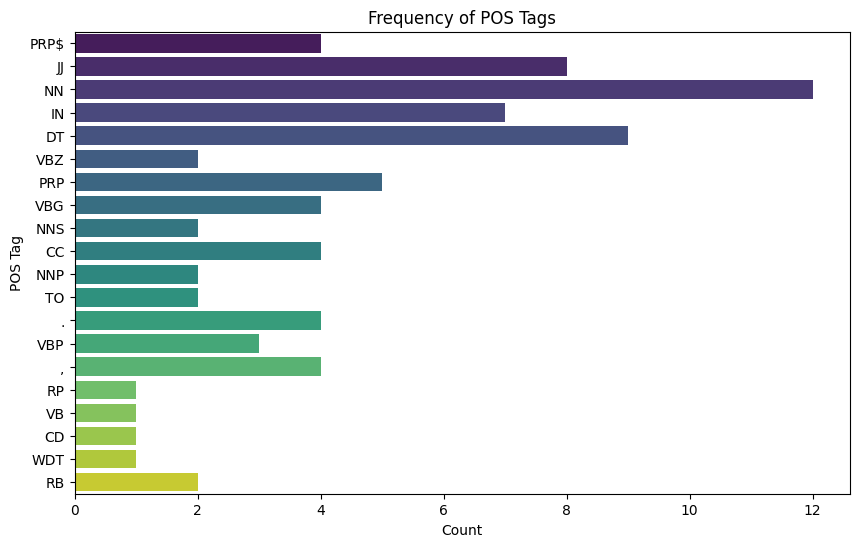

In [89]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='POS Tag', data=df, hue='POS Tag', palette='viridis', legend=False)
plt.xlabel('Count')
plt.ylabel('POS Tag')
plt.title('Frequency of POS Tags')
plt.show()

# 5. Other useful tools: sentiment analysis

The provided data is the result of a sentiment analysis performed using the SentimentIntensityAnalyzer imported from the Natural Language Toolkit (NLTK).
This tool analyzes a given text and returns a dictionary with the following keys and their corresponding values.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

analyzer.polarity_scores(str(only_text))

{'neg': 0.067, 'neu': 0.838, 'pos': 0.094, 'compound': 0.9951}

| Parameter | Result |
| --- | ----------- |
| neg | 0.067 |
| neu | 0.838 |
| pos | 0.094    |
| compound | 0.9951 |

Based on the results, we can deduce that:

*   **neg**: 6.7% of the text has a negative sentiment.
*   **neu**: 83.8% of the text has a neutral sentiment.
*   **pos**: 9.4% of the text has a positive sentiment.
*   **compound**: overall score of 0.9951 suggests a highly positive overall sentiment.

Although the text analyzed is predominantly neutral, the high compound score (0.9951) indicates that the overall sentiment leans very strongly towards positive.

# **AS YOU CAN SEE...** <br>
endless are the possibilities of conducting linguistic data analysis! I would have included more tools and subsequently displayed their abilities in the field, yet I leave it up **to you** now to delve deeper into this fascinating, rapidly growing rabbit hole!

# 6. Bibliography 🐈‍⬛


*   Guardian News and Media. (2021). The inner lives of cats: What our feline friends really think about hugs, happiness and humans. The Guardian. https://www.theguardian.com/lifeandstyle/2021/dec/08/the-inner-lives-of-cats-what-our-feline-friends-really-think-about-hugs-happiness-and-humans


